<a href="https://colab.research.google.com/github/MarceloPiemonteRibeiro/Working-with-PDFs-and-other-sources/blob/main/Google%20Sheets/Test_API_Google_Sheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import a dummy API (Google stock prices)

Source https://blog.quantinsti.com/historical-market-data-python-api/

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


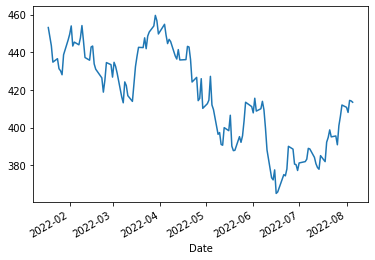

In [2]:
!pip install matplotlib
# Import yfinance and matplotlib
import yfinance as yf  
import matplotlib.pyplot as plt
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
data = yf.download('SPY','2022-01-18','2022-08-06')
# Plot the close prices
data["Adj Close"].plot()
plt.show()

Add index to dataframe

In [3]:
# data.reset_index(inplace=True) # transform Date from index to column
# data['Date'].astype(str) # transform date type to string so below to export to Google Sheets you need to transform the df to json
#data = data.rename(columns = {'index':'Date'})
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,409.149994,413.410004,408.399994,410.769989,410.769989,69997500
2022-08-02,409.119995,413.000000,406.820007,408.059998,408.059998,63435400
2022-08-03,410.299988,415.679993,410.000000,414.450012,414.450012,67820600
2022-08-04,414.369995,415.089996,412.440002,414.170013,414.170013,45656600
2022-08-05,409.660004,414.149994,409.600006,413.470001,413.470001,56755600


Try another ticker

In [23]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data_today = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data_today.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,161.009995,163.589996,160.889999,161.509995,161.285965,67829400
2022-08-02,160.100006,162.410004,159.630005,160.009995,159.788040,59907000
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.899567,82507500
2022-08-04,166.009995,167.190002,164.429993,165.809998,165.580002,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600


Try today date

In [6]:
def history(self, period="1mo", interval="1d",
            start=None, end=None, prepost=False, actions=True,
            auto_adjust=True, back_adjust=False,
            proxy=None, rounding=False, tz=None, timeout=None, **kwargs):
    """
    :Parameters:
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        prepost : bool
            Include Pre and Post market data in results?
            Default is False
        auto_adjust: bool
            Adjust all OHLC automatically? Default is True
        back_adjust: bool
            Back-adjusted data to mimic true historical prices
        proxy: str
            Optional. Proxy server URL scheme. Default is None
        rounding: bool
            Round values to 2 decimal places?
            Optional. Default is False = precision suggested by Yahoo!
        tz: str
            Optional timezone locale for dates.
            (default data is returned as non-localized dates)
        timeout: None or float
            If not None stops waiting for a response after given number of
            seconds. (Can also be a fraction of a second e.g. 0.01)
            Default is None.
        **kwargs: dict
            debug: bool
                Optional. If passed as False, will suppress
                error message printing to console.
    """

goog = yf.Ticker('goog')
data2 = goog.history()
data2.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-01,115.529999,117.120003,114.690002,115.480003,22856200,0,0.0
2022-08-02,114.430000,117.080002,114.260002,115.900002,17911000,0,0.0
2022-08-03,116.339996,119.419998,116.150002,118.779999,25302800,0,0.0
2022-08-04,118.300003,119.500000,117.709999,118.870003,15757700,0,0.0
2022-08-05,116.930000,118.860001,116.709999,118.220001,15607600,0,0.0


# Import data from Google Sheets

Source: https://www.youtube.com/watch?v=cN7W2EPM-dw

In [7]:
!pip install --upgrade gspread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


Import data from Google Sheets

In [8]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

wb = gc.open_by_key('13qIP8ytx2k-DPqDli9HlU5mSwUh53cIOEPGrzD-0Jsg') # id from the google sheet you need to create
ws=wb.worksheet('Kaggle') # name of the tab from Google sheets you want
# get_all_values gives a list of rows.
rows = ws.get_all_values()
print(rows)



[['Date', 'House_Price_Index', 'Stock_Price_Index', 'Consumer_Price_Index', 'Population', 'Unemployment_Rate', 'Real_GDP', 'Mortgage_Rate', 'Real_Disposable_Income'], ['01/01/1975', '61.09', '6.714.653', '6.530.488', '98.599', '846.667', '5.648.462', '904.712', '19908'], ['01/01/1976', '65.525', '7.996.264', '6.905.653', '95.022', '771.667', '5.952.809', '886.585', '20346'], ['01/01/1977', '73.435', '788.254', '7.354.636', '100.577', '706.667', '6.228.076', '884.519', '20780'], ['01/01/1978', '83.745', '7.884.679', '7.915.866', '105.957', '606.667', '6.572.819', '964.173', '21497'], ['01/01/1979', '951.325', '8.563.207', '8.806.755', '110.358', '583.333', '6.780.924', '1.120.365', '21672'], ['01/01/1980', '1.026.675', '100', '100', '95.959', '714.167', '6.763.514', '1.374.212', '21584'], ['01/01/1981', '1.072.375', '1.086.752', '1.103.347', '98.142', '7.6', '6.935.153', '1.664.151', '21891'], ['01/01/1982', '108.46', '1.012.065', '1.170.998', '95.332', '970.833', '6810.12', '1.604.365'

In [9]:
# Convert to a DataFrame and render.
import pandas as pd
dfKaggle=pd.DataFrame.from_records(rows[1:],columns=rows[0]) # add [] to put the name of columns as header in my df
dfKaggle.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,01/01/1975,61.09,6.714.653,6.530.488,98.599,846.667,5.648.462,904.712,19908
1,01/01/1976,65.525,7.996.264,6.905.653,95.022,771.667,5.952.809,886.585,20346
2,01/01/1977,73.435,788.254,7.354.636,100.577,706.667,6.228.076,884.519,20780
3,01/01/1978,83.745,7.884.679,7.915.866,105.957,606.667,6.572.819,964.173,21497
4,01/01/1979,951.325,8.563.207,8.806.755,110.358,583.333,6.780.924,1.120.365,21672


# Export dataframe to Google sheets 

Source: https://www.youtube.com/watch?v=SObQewMLVTg

In [10]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

wb = gc.open_by_key('13qIP8ytx2k-DPqDli9HlU5mSwUh53cIOEPGrzD-0Jsg') # id from the google sheet
ws=wb.worksheet('API_Google_Stock')

# ws.update_cell(1,1,'Teste') # write in a specific cell
header=data.columns.to_list()
#manual_header=['Date','Open', 'High',	'Low',	'Close',	'Adj Close', 'Volume']
data_api=[header]+ data.to_numpy().tolist()

ws.update(None,data_api)

{'spreadsheetId': '13qIP8ytx2k-DPqDli9HlU5mSwUh53cIOEPGrzD-0Jsg',
 'updatedCells': 840,
 'updatedColumns': 6,
 'updatedRange': 'API_Google_Stock!A1:F140',
 'updatedRows': 140}

Make sure gspread version >5.0

In [25]:
gspread.__version__
# !pip install --upgrade gspread

'5.4.0'

Test another stock APPL

In [11]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

wb = gc.open_by_key('13qIP8ytx2k-DPqDli9HlU5mSwUh53cIOEPGrzD-0Jsg') # id from the google sheet
ws=wb.worksheet('API_Appl_stock')

# ws.update_cell(1,1,'Teste') # write in a specific cell
header2=data2.columns.to_list()
#manual_header=['Date','Open', 'High',	'Low',	'Close',	'Adj Close', 'Volume']
data_api2=[header2]+ data2.to_numpy().tolist()

ws.update(None,data_api2)

{'spreadsheetId': '13qIP8ytx2k-DPqDli9HlU5mSwUh53cIOEPGrzD-0Jsg',
 'updatedCells': 168,
 'updatedColumns': 7,
 'updatedRange': 'API_Appl_stock!A1:G24',
 'updatedRows': 24}

Test a dummy data frame

In [12]:
import pandas as pd  
  
# assign data of lists.  
dataframe = {'Name':['Renault', 'Duster', 'Maruti', 'Honda City'], 'Ratings':[9.0, 4.0, 5.0, 4.0]}  
  
# Creates pandas DataFrame.  
df = pd.DataFrame(dataframe)  
  
# print the data  
print(df)  

         Name  Ratings
0     Renault      9.0
1      Duster      4.0
2      Maruti      5.0
3  Honda City      4.0


In [13]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

wb = gc.open_by_key('13qIP8ytx2k-DPqDli9HlU5mSwUh53cIOEPGrzD-0Jsg') # id from the google sheet
ws=wb.worksheet('Dummy_df')

# ws.update_cell(1,1,'Teste') # write in a specific cell
header=df.columns.to_list()
#manual_header=['Date','Open', 'High',	'Low',	'Close',	'Adj Close', 'Volume']
data_api=[header]+ df.to_numpy().tolist()

ws.update(None,data_api)

{'spreadsheetId': '13qIP8ytx2k-DPqDli9HlU5mSwUh53cIOEPGrzD-0Jsg',
 'updatedCells': 10,
 'updatedColumns': 2,
 'updatedRange': 'Dummy_df!A1:B5',
 'updatedRows': 5}

In [21]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

wb = gc.open_by_key('13qIP8ytx2k-DPqDli9HlU5mSwUh53cIOEPGrzD-0Jsg') # id from the google sheet
ws=wb.worksheet('today_df')

# ws.update_cell(1,1,'Teste') # write in a specific cell
header=data_today.columns.to_list()
#manual_header=['Date','Open', 'High',	'Low',	'Close',	'Adj Close', 'Volume']
data_api=[header]+ data_today.to_numpy().tolist()

ws.update(None,data_api)

TypeError: ignored

In [15]:
data_today

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-13,148.970001,149.440002,148.270004,149.100006,148.269180,59375000
2021-08-16,148.539993,151.190002,146.470001,151.119995,150.277908,103296000
2021-08-17,150.229996,151.679993,149.089996,150.190002,149.353088,92229700
2021-08-18,149.800003,150.720001,146.149994,146.360001,145.544449,86326000
2021-08-19,145.029999,148.000000,144.500000,146.699997,145.882538,86960300
...,...,...,...,...,...,...
2022-08-01,161.009995,163.589996,160.889999,161.509995,161.285965,67829400
2022-08-02,160.100006,162.410004,159.630005,160.009995,159.788040,59907000
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.899567,82507500
